# Задание 6: Жесткие системы

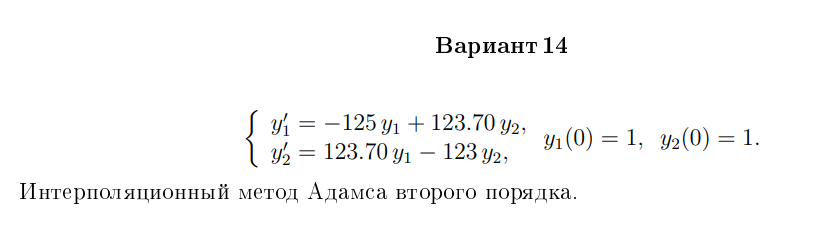

In [1]:
import numpy as np
from numpy.typing import NDArray
from typing import Callable, Literal, Tuple
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython.display import Latex, Markdown, display
import pandas as pd

In [2]:
def latexify(arr: NDArray) -> str:
    res = []
    res.append('\\begin{pmatrix}')
    if len(arr.shape) == 1:
        for i in range(arr.size):
            res.append(f"{arr[i]:.8f}")
            if i != arr.size - 1:
                res.append("\\\\")
    elif len(arr.shape) == 2:
        for i in range(arr.shape[0]):
            for j in range(arr.shape[1]):
                res.append(f"{arr[i][j]:.4f}")
                if j != arr.shape[1] - 1:
                    res.append("&")
            if i != arr.shape[0] - 1:
                res.append("\\\\")
    res.append('\\end{pmatrix}')
    return ' '.join(res)

def print_tex(*argv) -> None:
    """Displays a LaTeX Markdown output"""
    res = ' '.join(['$$'] + [(latexify(arg) if isinstance(arg,
                   np.ndarray) else str(arg)) for arg in argv] + ['$$'])
    display(Markdown(res))

def plot(y: Callable, title: str, t_r=1):
    fig, ax = plt.subplots(figsize=(10, 6), dpi=200)
    T = np.linspace(0, t_r, 100)
    Y = np.array([y(t) for t in T]).T
    plt.plot(T, Y[0], color="red", label=r"$y_1$", alpha=0.8)
    plt.plot(T, Y[1], color="blue", label=r"$y_2$", alpha=0.8)
    ax.set_xlabel("t")
    ax.set_ylabel("y")
    ax.set_title(title)
    ax.legend()
    ax.grid()
    plt.show()

def grid(y: Callable, h: float):
    d = {}
    n = int(.5 / h)
    for i in range(n+1):
        y1, y2 = y(i * h)
        d[f"{i * 0.5 / n}"] = {
            "y1": y1,
            "y2": y2
        }
    return pd.DataFrame(d).T

In [3]:
A = np.array([[-125, 123.70 ], [123.70, -123]])
print_tex("A=", A)

$$ A= \begin{pmatrix} -125.0000 & 123.7000 \\ 123.7000 & -123.0000 \end{pmatrix} $$

In [4]:
values, vectors = np.linalg.eig(A)
for i in range(len(values)):
    print_tex(fr"\lambda_{i+1} = ", values[i], fr",~v_{i+1} = ", vectors[i])

$$ \lambda_1 =  -247.70404197114982 ,~v_1 =  \begin{pmatrix} -0.70995909 \\ -0.70424292 \end{pmatrix} $$

$$ \lambda_2 =  -0.29595802885016553 ,~v_2 =  \begin{pmatrix} 0.70424292 \\ -0.70995909 \end{pmatrix} $$

In [5]:
# Точное Решение
c1, c2 = np.linalg.solve(vectors, np.array([1,1]))
y_exact = lambda x: (c1 * vectors[:,0] * np.exp(values[0] * x) + c2 * vectors[:, 1] * np.exp(values[1] * x)).reshape(2)

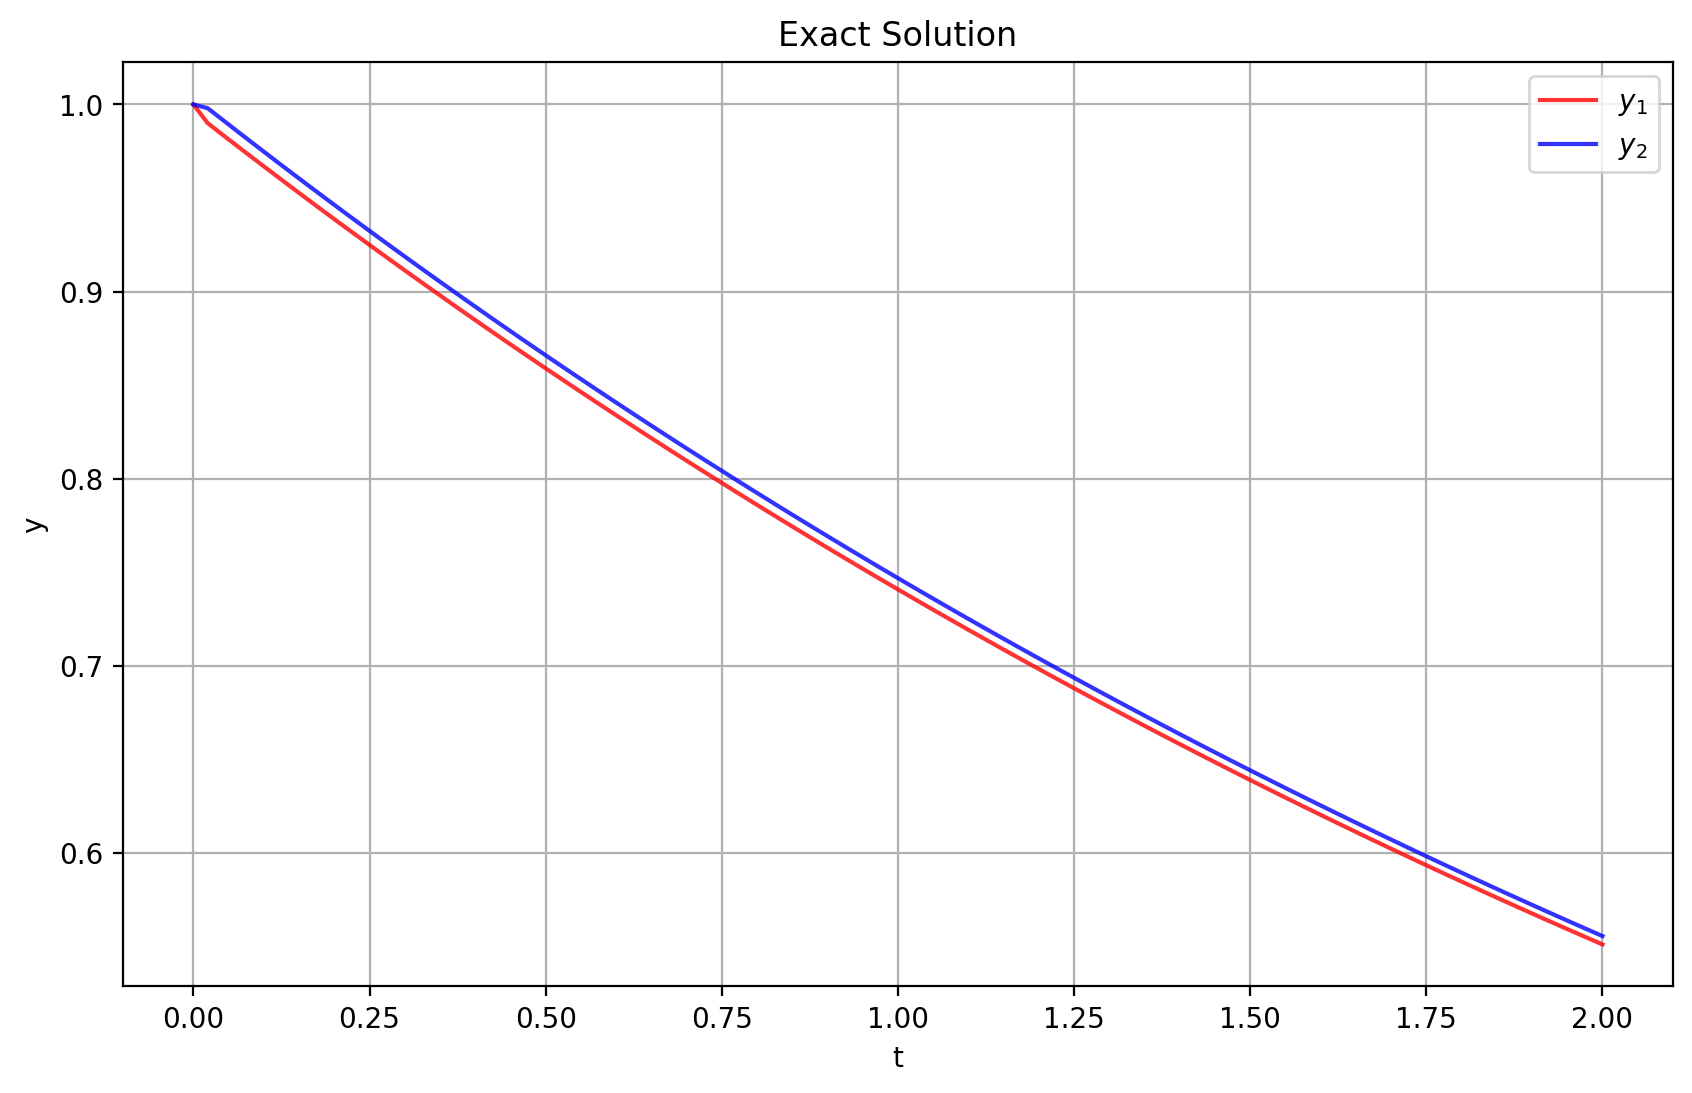

In [6]:
plot(y_exact, title="Exact Solution", t_r=2)

In [7]:
grid(y_exact, 0.1)

,y1,y2
0.0,1.000000,1.000000
0.1,0.966898,0.974746
0.2,0.938701,0.946320
0.3,0.911327,0.918724
0.4,0.884750,0.891932
0.5,0.858949,0.865921


In [8]:
# Явный метод Эйлера
h = .05


def euler(h) -> Tuple[NDArray, NDArray]:
    n = int(.5 / h)
    y_eu = np.zeros((n+1, 2))
    y_eu[0] = np.array([1., 1.])
    y_eu_error = np.zeros((n+1, 2))
    y_eu_error[0] = np.array([0., 0.])
    E = np.identity(2)
    W = E + A * h
    # vals, _ = np.linalg.eig(W)
    # print(vals)
    
    for i in range(1, n + 1):
        y_eu[i] = W @ y_eu[i-1]
        y_eu_error[i] = np.abs(y_eu[i] - y_exact(i * h))

    return y_eu, y_eu_error


y_eu, y_eu_error = euler(h=.05)
pd.DataFrame({
    "Euler (y1)" : y_eu.T[0],
    "Euler (y2)" : y_eu.T[1],
    "Error (y1)": y_eu_error.T[0],
    "Error (y2)": y_eu_error.T[1]
})

,Euler (y1),Euler (y2),Error (y1),Error (y2)
0,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
1,9.350000e-01,1.035000e+00,4.631244e-02,4.572253e-02
2,1.492725e+00,4.527250e-01,5.258270e-01,5.220210e-01
3,-5.036702e+00,6.900970e+00,5.989397e+00,5.940542e+00
4,6.912519e+01,-6.669200e+01,6.818649e+01,6.763832e+01
5,-7.753973e+02,7.710031e+02,7.763222e+02,7.700707e+02
6,8.839490e+03,-8.766498e+03,8.838578e+03,8.767417e+03
7,-1.006281e+05,9.981971e+04,1.006290e+05,9.981880e+04
8,1.145682e+06,-1.136456e+06,1.145682e+06,1.136457e+06
9,-1.304382e+07,1.293880e+07,1.304382e+07,1.293880e+07


In [9]:
y_eu, y_eu_error = euler(2 / np.max(np.abs(values)))
pd.DataFrame({
    "Euler (y1)" : y_eu.T[0],
    "Euler (y2)" : y_eu.T[1],
    "Error (y1)": y_eu_error.T[0],
    "Error (y2)": y_eu_error.T[1]
})

,Euler (y1),Euler (y2),Error (y1),Error (y2)
0,1.000000,1.000000,0.000000,0.000000
1,0.989504,1.005652,0.004610,0.004568
2,0.995246,0.995207,0.003978,0.003958
3,0.984761,1.000871,0.004077,0.004027
4,0.990514,0.990437,0.004046,0.004036
...,...,...,...,...
57,0.864920,0.880057,0.004200,0.003883
58,0.870960,0.869913,0.003914,0.004171
59,0.860772,0.875875,0.004204,0.003878
60,0.866822,0.865741,0.003910,0.004175


In [19]:
# Обратный метод Эйлера

def euler_inv(h=.05) -> Tuple[NDArray, NDArray]:
    n = int(.5 / h)
    y_eu_inv = np.zeros((n+1, 2))
    y_eu_inv[0] = np.array([1., 1.])
    y_eu_inv_error = np.zeros((n+1, 2))
    y_eu_inv_error[0] = np.array([0., 0.])
    E = np.identity(2)
    W = np.linalg.inv(E - A * h)

    for i in range(1, n + 1):
        y_eu_inv[i] = W @ y_eu_inv[i-1]
        y_eu_inv_error[i] = np.abs(y_eu_inv[i] - y_exact(i * h))

    return y_eu_inv, y_eu_inv_error

y_eu_inv, y_eu_inv_error = euler_inv()
pd.DataFrame({
    "Inverse Euler (y1)" : y_eu_inv.T[0],
    "Inverse Euler (y2)" : y_eu_inv.T[1],
    "Error (y1)": y_eu_inv_error.T[0],
    "Error (y2)": y_eu_inv_error.T[1]
})

,Inverse Euler (y1),Inverse Euler (y2),Error (y1),Error (y2)
0,1.000000,1.000000,0.000000,0.000000
1,0.981722,0.989084,0.000410,0.000193
2,0.967130,0.974935,0.000232,0.000189
3,0.953007,0.960739,0.000312,0.000311
4,0.939108,0.946731,0.000407,0.000410
5,0.925414,0.932926,0.000502,0.000506
6,0.911920,0.919321,0.000593,0.000598
7,0.898622,0.905916,0.000682,0.000687
8,0.885518,0.892706,0.000768,0.000774
9,0.872605,0.879688,0.000851,0.000858


In [23]:
# Метод Аддамса второго порядка

def addams_2(h=.05) -> Tuple[NDArray, NDArray]:
    n = int(.5 / h)
    y_add = np.zeros((n+1, 2))
    y_add[0] = np.array([1., 1.])
    y_add_error = np.zeros((n+1, 2))
    y_add_error[0] = np.array([0., 0.])
    E = np.identity(2)
    W = np.linalg.inv(E - A * h / 2) @ (E + A * h / 2)

    for i in range(1, n + 1):
        y_add[i] = W @ y_add[i-1]
        y_add_error[i] = np.abs(y_add[i] - y_exact(i * h))

    return y_add, y_add_error

y_add, y_add_error = addams_2(.001)

pd.DataFrame({
    "Addams (y1)" : y_add.T[0],
    "Addams (y2)" : y_add.T[1],
    "Error (y1)": y_add_error.T[0],
    "Error (y2)": y_add_error.T[1]
})

,Addams (y1),Addams (y2),Error (y1),Error (y2)
0,1.000000,1.000000,0.000000e+00,0.000000e+00
1,0.998811,1.000590,4.046923e-06,4.014335e-06
2,0.997819,1.000985,6.313947e-06,6.263103e-06
3,0.996981,1.001227,7.388195e-06,7.328697e-06
4,0.996262,1.001351,7.684637e-06,7.622747e-06
...,...,...,...,...
496,0.859967,0.866947,9.214650e-10,9.289440e-10
497,0.859712,0.866690,9.230495e-10,9.305415e-10
498,0.859458,0.866434,9.246331e-10,9.321379e-10
499,0.859203,0.866177,9.262155e-10,9.337333e-10
